# Prosper loan Data Exploration
## by Felix Oloyede

## Table of Content

<ul>
<li><a href="#investigation overview">Investigation Overview</a></li>
<li><a href="#dataset overview">Dataset Overview</a></li>
    
</ul>

## Investigation Overview

This presentation is based on an examination of the characteristics of loans with higher financing percentages.

## Dataset Overview

Prosper loan data made available through Udacity. Using this URL: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000, it was downloaded. Each loan in this dataset has 81 characteristics, including the loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more. There are 113,937 loans in this dataset.

Importing Python libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

Load dataset

In [6]:
#Load data
df = pd.read_csv('cleaned_Loan_prosper_data.csv')

In [7]:
#load loan data to visually access it
df

,Unnamed: 0,LoanStatus,LenderYield,ProsperRating (Alpha),ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PercentFunded
0,0,Completed,0.1380,C,Not AVilable,CO,Other,Self-employed,True,True,...,0.17,NaN,True,Q3,330.43,0,0,0.0,258,1.0
1,1,Current,0.0820,A,HOme Improvement,CO,Professional,Employed,False,False,...,0.18,NaN,True,Q1,318.93,0,0,0.0,1,1.0
2,2,Completed,0.2400,HR,Not AVilable,GA,Other,Not available,False,True,...,0.06,Not displayed,True,Q1,123.32,0,0,0.0,41,1.0
3,3,Current,0.0874,A,Motorcycle,GA,Skilled Labor,Employed,True,False,...,0.15,NaN,True,Q4,321.45,0,0,0.0,158,1.0
4,4,Current,0.1985,D,HOme Improvement,MN,Executive,Employed,True,False,...,0.26,"$100,000+",True,Q3,563.97,0,0,0.0,20,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111402,113932,Current,0.1764,C,Debt Consolidation,IL,Food Service Management,Employed,True,False,...,0.13,NaN,True,Q2,364.74,0,0,0.0,1,1.0
111403,113933,FinalPaymentInProgress,0.1010,A,Other,PA,Professional,Employed,True,False,...,0.11,NaN,True,Q4,65.57,0,0,0.0,22,1.0
111404,113934,Current,0.2050,D,Debt Consolidation,TX,Other,Employed,True,False,...,0.51,NaN,True,Q4,273.35,0,0,0.0,119,1.0
111405,113935,Completed,0.2505,C,HOme Improvement,GA,Food Service,Full-time,True,False,...,0.48,NaN,True,Q4,449.55,0,0,0.0,274,1.0


Define the ordinal and nominal data

In [8]:
#ordinal category
ordinal_categorical = {'ProsperRating (Alpha)':['AA','A','B','C','D','E','HR'],
                       'LoanOriginationQuarter': ['Q1', 'Q2', 'Q3', 'Q4']
                      }


#nominal categorical
nominal_categorical = ['EmploymentStatus','LoanStatus', 'BorrowerState', 'Occupation']

In [9]:
for var in ordinal_categorical:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_categorical[var])
    df[var] = df_loan[var].astype(ordered_var)
        
for var in nominal_categorical:
    df[var] = df_loan[var].astype('category')
    

Test

In [10]:
print(df[ordinal_categorical].dtypes, end = '\n\nnominal data \n')
print(df[nominal_categorical].dtypes)

ProsperRating (Alpha)     category
LoanOriginationQuarter    category
dtype: object

nominal data 
EmploymentStatus    category
LoanStatus          category
BorrowerState       category
Occupation          category
dtype: object


In [11]:
#Check top rows of the data
df.head()

,Unnamed: 0,LoanStatus,LenderYield,ProsperRating (Alpha),ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PercentFunded
0,0,Completed,0.1380,C,Not AVilable,CO,Other,Self-employed,True,True,...,0.17,NaN,True,Q3,330.43,0,0,0.0,258,1.0
1,1,Current,0.0820,A,HOme Improvement,CO,Professional,Employed,False,False,...,0.18,NaN,True,Q1,318.93,0,0,0.0,1,1.0
2,2,Completed,0.2400,HR,Not AVilable,GA,Other,Not available,False,True,...,0.06,Not displayed,True,Q1,123.32,0,0,0.0,41,1.0
3,3,Current,0.0874,A,Motorcycle,GA,Skilled Labor,Employed,True,False,...,0.15,NaN,True,Q4,321.45,0,0,0.0,158,1.0
4,4,Current,0.1985,D,HOme Improvement,MN,Executive,Employed,True,False,...,0.26,"$100,000+",True,Q3,563.97,0,0,0.0,20,1.0


In [12]:
def boxplots(fig_width, fig_height,  cat_data, num_data, data, title):

    plt.figure(figsize = (fig_width, fig_height))
    sb.boxplot(x = cat_data, y = num_data, data = data, color = 'teal')
    plt.title(title, fontdict = {'fontweight': 'bold', 'fontsize' : 24}, pad = 24)
    plt.xticks(rotation = 90);
    plt.subplots_adjust(hspace = 1.4)
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'{num_data}', fontdict = {'weight': 'bold'})

In [13]:
def full_funding(cat_data, title, fig_size = None):

    if fig_size != None:
        plt.figure(figsize = fig_size)
    full_funding = data[data['PercentFunded'] == 1]
    sb.countplot(x = cat_data, data = full_funding, color = 'brown')
    plt.xticks(rotation = 90);
    plt.title(f'count of {title} that had full percent funding', 
             fontdict = {'fontweight': 'bold', 'fontsize' : 24});
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'Count of {cat_data} for \n loans with full funding', fontdict = {'weight': 'bold'})

In [14]:
not_including_1 = df[df['PercentFunded'] < 1]

## Relationship between Percent Funded and Loan status for not fully funded loans

- Loans with a past due status (31–60 days) have a wider range of percent funded than loans with other statuses, with the majority of percent funding falling between 77% and 82%.


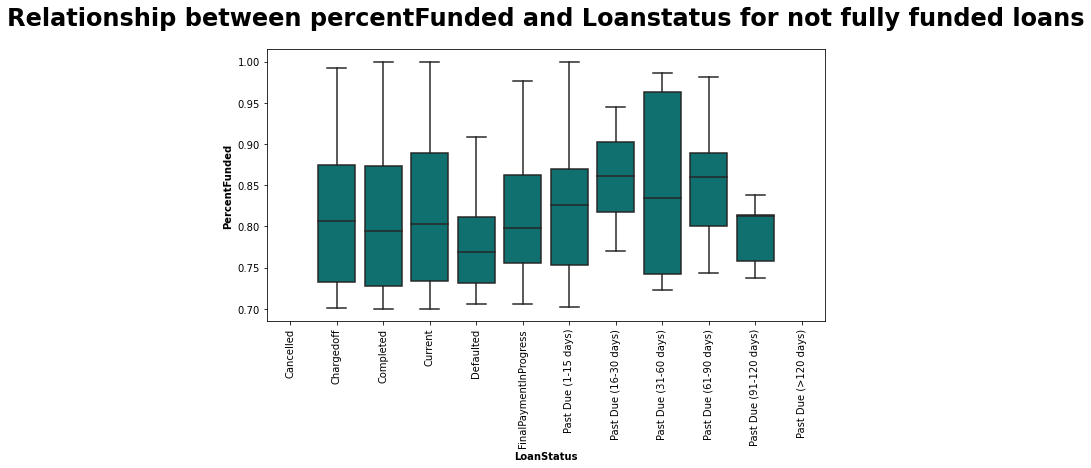

In [15]:
boxplots(10, 5, 'LoanStatus', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and Loanstatus for not fully funded loans')

## Relationship between Percent Funded and Prosper Rating for not fully funded loans

- Compared to other ratings, Prosper Rating C has a higher percentage financed.

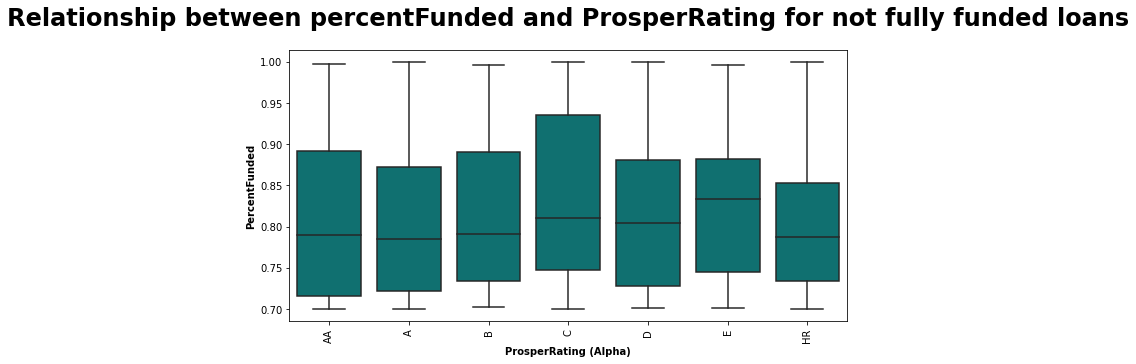

In [16]:
boxplots(10, 5, 'ProsperRating (Alpha)', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and ProsperRating for not fully funded loans')


##  Relationship between Percent Funded and Listing Category for not fully funded loans

- Loans for home improvement, business, debt consolidation, household expenses, medical/dental, and other expenses had the widest range of percent funded, whereas Loans for baby and adoption, cosmetic procedures, green loans, and not available had the narrowest range, with values of about 81%, 85%, 71%, and 83%, respectively. Less vacation time is granted than in other groups.

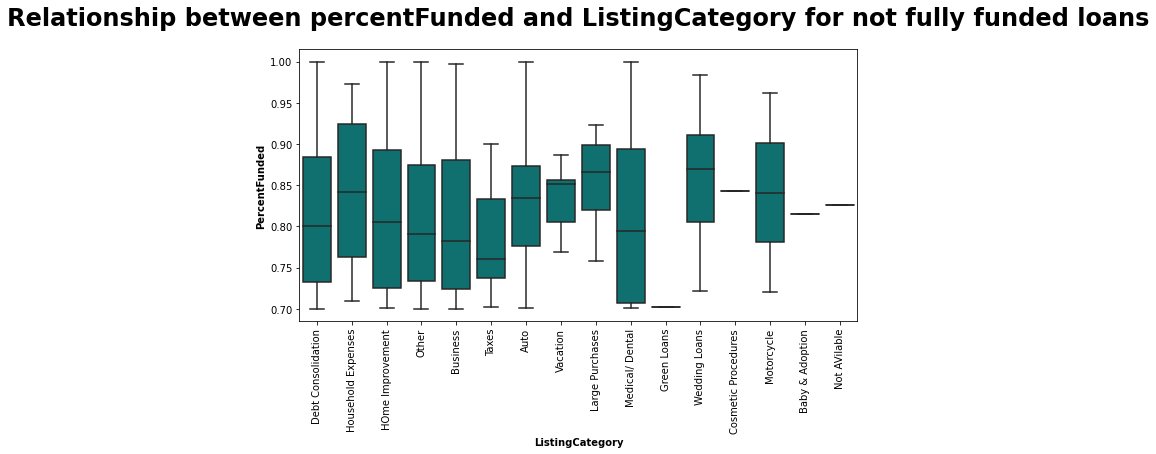

In [17]:
boxplots(10, 5, 'ListingCategory', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and ListingCategory for not fully funded loans')

## Relationship between Percent Funded and Borrower State for not fully funded loans

- The percent of funding was lower in Utah, New Mexico, Alaska, and Washington.
- Nevada and Idaho had high financed percentages.

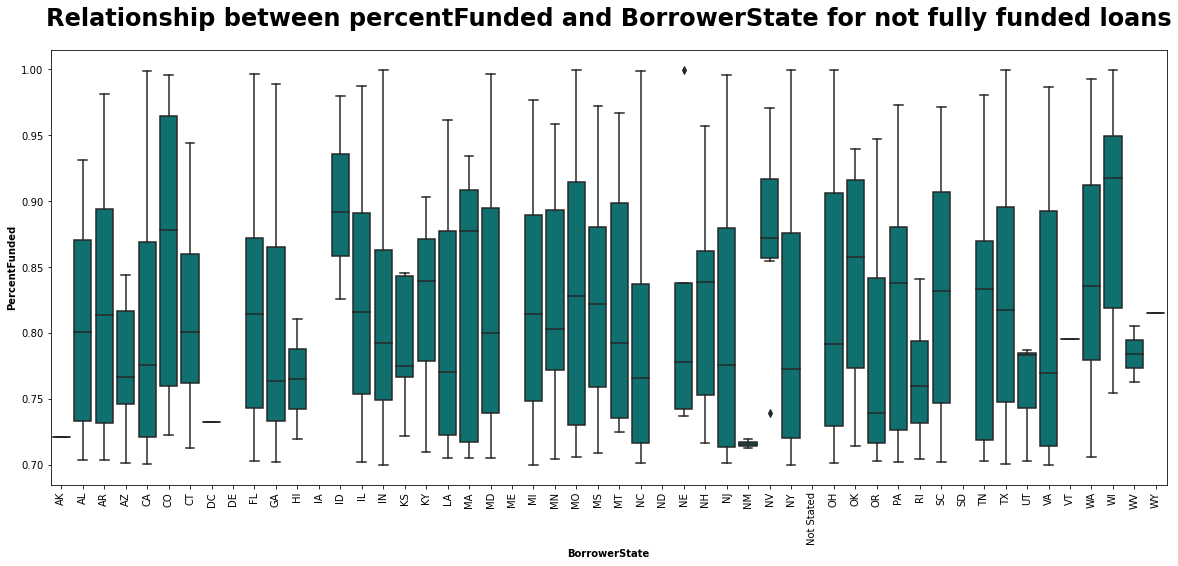

In [18]:
boxplots(20, 8, 'BorrowerState', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and BorrowerState for not fully funded loans')

## Relationship between Percent Funded and Occupation for not fully funded loans

- Car dealers and mechanical engineers received a high percentage of funding
- firefighters and chemical engineers received a lesser percentage. Funded

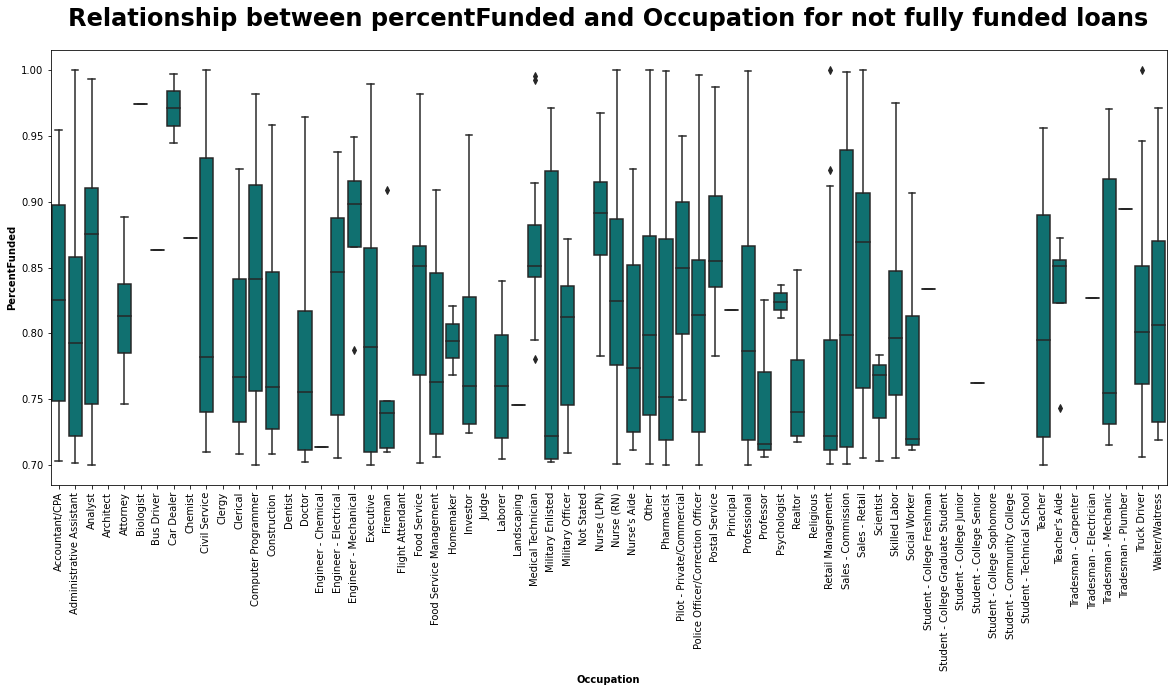

In [19]:
boxplots(20, 8, 'Occupation', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and Occupation for not fully funded loans')

In [20]:
def vari(col = None, numerical = False, facet = False, minimum = None, pad = None):
    
    plt.figure(figsize = (10,5))
    if numerical:
        plt.scatter(data = not_including_1, x = 'LenderYield', y = 'PercentFunded', c = col, \
           cmap = 'Accent', vmin = minimum)
        plt.colorbar(label = col)
    elif facet:
        g = sb.FacetGrid(data = not_including_1, col = col, col_wrap =3)
        g.map(sb.regplot, 'LenderYield', 'PercentFunded')
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad = pad)
    else:
        sb.scatterplot(x = 'LenderYield', y = 'PercentFunded', data = not_including_1,\
                       hue = col, s = 70);
    if not facet:
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad  = 10)
        plt.xlabel('LenderYield', fontdict = {'weight':'bold'})
        plt.ylabel('PercentFunded', fontdict = {'weight':'bold'});
    plt.legend(loc = 'right', bbox_to_anchor = (1.5,1))

## Relationship between Lender Yield, Percent Funded and Prosper Rating (Alpha)

- All grades had the same range of percent funded, with the exception of E, which had the lowest percent funded to be over 70%. Lender yield decreased from AA to HR.

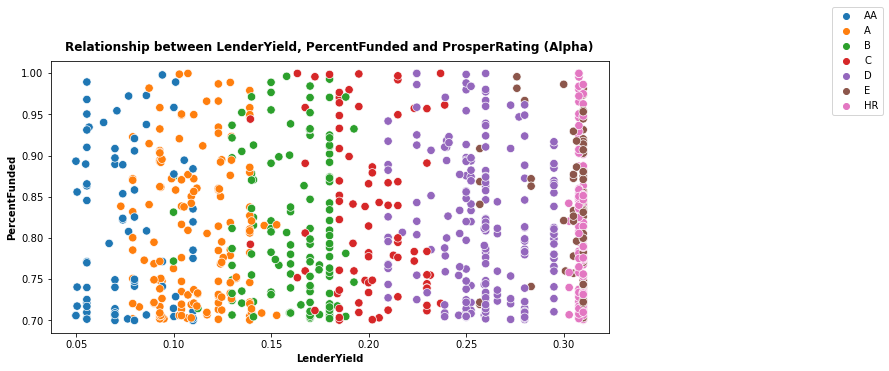

In [21]:
vari('ProsperRating (Alpha)')

## Relationship between Lender Yield, Percent Funded and Currently in group

- Most of the loans from borrowers in groups had lower lender yields, however for loans that weren't fully funded, their funding percentage ranged from 72% to 97%.

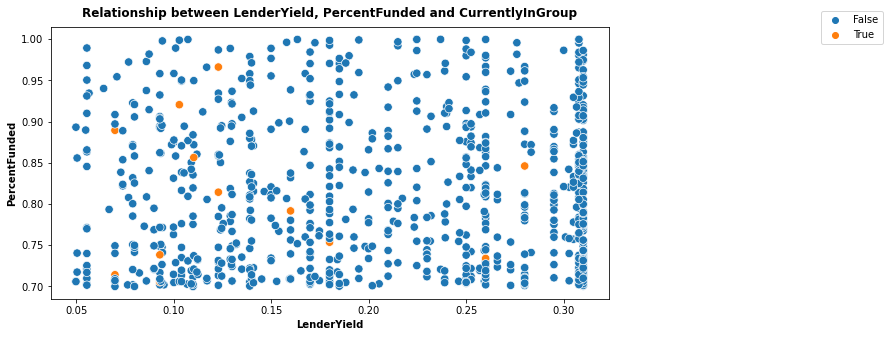

In [22]:
vari('CurrentlyInGroup')

## Relationship between Lender Yield, Percent Funded and Total Credit in past 7Years

- Most loans with total credits of 65 to 75 have low funds percentages below 75 percent, whereas loans with total credits of 35 to 45 have high funds percentages above 85%.

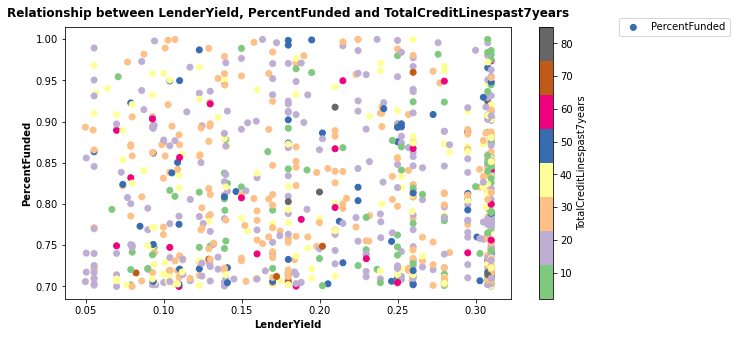

In [23]:
vari(numerical= True, col= 'TotalCreditLinespast7years')

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_Slide_Deck_Template.ipynb --to slides --post serve --no-input --no-prompt